## Analyzing stock prices

We will start by installing the [googlefinance package](https://pypi.python.org/pypi/googlefinance) and the [yahoo-finance](https://pypi.python.org/pypi/yahoo-finance) packages, to be able to get the stock prices.

The `googlefinance` package provides no delay, real time stock data in NYSE & NASDAQ. The `yahoo-finance` data is delayed by 15 min, but it provides the ability to fetch historical day-by-day stock data.

*Note: Recently, Pandas added the capability of retrieving data from Yahoo Finance, Google Finance, plus many other data sources (e.g., World Bank, FamaFrench, etc). However, this is still experimental. http://pandas.pydata.org/pandas-docs/stable/remote_data.html *

*Note 2: The notebooks by [Thomas Wiecki](https://github.com/twiecki/financial-analysis-python-tutorial) are a useful introduction to the topic.*


In [ ]:
!sudo -H pip install googlefinance

In [ ]:
!sudo -H pip install yahoo-finance

### Yahoo Finance API

#### Example: Yahoo! Inc. (YHOO)

In [1]:
from yahoo_finance import Share

yahoo = Share('YHOO')
print "Open:", yahoo.get_open()
print "Current:", yahoo.get_price()
print "Last Trade:", yahoo.get_trade_datetime()

Open: 29.13
Current: 27.97
Last Trade: 2016-02-05 21:00:00 UTC+0000


Refresh data from market

In [2]:
yahoo.refresh()
print "Current:", yahoo.get_price()
print "Last Trade:", yahoo.get_trade_datetime()

Current: 27.97
Last Trade: 2016-02-05 21:00:00 UTC+0000


Historical data

In [3]:
yahoo.get_historical('2016-01-01', '2016-01-08')

[{'Adj_Close': '30.629999',
  'Close': '30.629999',
  'Date': '2016-01-08',
  'High': '31.540001',
  'Low': '30.00',
  'Open': '30.51',
  'Symbol': 'YHOO',
  'Volume': '26299600'},
 {'Adj_Close': '30.16',
  'Close': '30.16',
  'Date': '2016-01-07',
  'High': '31.190001',
  'Low': '30.02',
  'Open': '30.969999',
  'Symbol': 'YHOO',
  'Volume': '20495000'},
 {'Adj_Close': '32.16',
  'Close': '32.16',
  'Date': '2016-01-06',
  'High': '32.459999',
  'Low': '31.60',
  'Open': '31.67',
  'Symbol': 'YHOO',
  'Volume': '16026500'},
 {'Adj_Close': '32.200001',
  'Close': '32.200001',
  'Date': '2016-01-05',
  'High': '32.330002',
  'Low': '31.530001',
  'Open': '31.549999',
  'Symbol': 'YHOO',
  'Volume': '14294000'},
 {'Adj_Close': '31.40',
  'Close': '31.40',
  'Date': '2016-01-04',
  'High': '32.349998',
  'Low': '31.139999',
  'Open': '32.119999',
  'Symbol': 'YHOO',
  'Volume': '25176200'}]

In [6]:
import pandas as pd
data_yahoo = yahoo.get_historical('2015-01-01', '2016-02-07')
df = pd.DataFrame(data_yahoo)


In [7]:
df.head(10)

,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume
0,27.969999,27.969999,2016-02-05,29.139999,27.73,29.059999,YHOO,16077500
1,29.15,29.15,2016-02-04,29.23,27.709999,27.91,YHOO,28517000
2,27.68,27.68,2016-02-03,28.610001,26.57,28.450001,YHOO,55527600
3,29.059999,29.059999,2016-02-02,30.23,28.129999,29.32,YHOO,34022500
4,29.57,29.57,2016-02-01,29.790001,28.790001,29.27,YHOO,12865800
5,29.51,29.51,2016-01-29,29.51,28.51,29.10,YHOO,18718300
6,28.75,28.75,2016-01-28,30.629999,28.60,30.59,YHOO,15420500
7,29.690001,29.690001,2016-01-27,30.530001,29.450001,29.90,YHOO,13269900
8,29.98,29.98,2016-01-26,30.190001,29.620001,29.76,YHOO,11422600
9,29.780001,29.780001,2016-01-25,30.389999,29.66,29.959999,YHOO,23095500


In [8]:
df.describe()

,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume
count,276,276,276,276,276,276,276,276
unique,252,252,276,245,253,262,1,276
top,40.939999,40.939999,2015-09-22,44.57,31.209999,44.299999,YHOO,9230000
freq,2,2,1,3,2,2,276,1


In [9]:
df.dtypes

Adj_Close    object
Close        object
Date         object
High         object
Low          object
Open         object
Symbol       object
Volume       object
dtype: object

In [10]:
df["Adj_Close"] = pd.to_numeric(df["Adj_Close"])
df["Close"] = pd.to_numeric(df["Close"])
df["High"] = pd.to_numeric(df["High"])
df["Low"] = pd.to_numeric(df["Low"])
df["Open"] = pd.to_numeric(df["Open"])
df["Volume"] = pd.to_numeric(df["Volume"])
df["Date"] = pd.to_datetime(df["Date"], unit='d')

In [11]:
df.set_index(keys="Date", inplace=True)

In [12]:
df.head(10)

,Adj_Close,Close,High,Low,Open,Symbol,Volume
Date,,,,,,,
2016-02-05,27.969999,27.969999,29.139999,27.730000,29.059999,YHOO,16077500
2016-02-04,29.150000,29.150000,29.230000,27.709999,27.910000,YHOO,28517000
2016-02-03,27.680000,27.680000,28.610001,26.570000,28.450001,YHOO,55527600
2016-02-02,29.059999,29.059999,30.230000,28.129999,29.320000,YHOO,34022500
2016-02-01,29.570000,29.570000,29.790001,28.790001,29.270000,YHOO,12865800
2016-01-29,29.510000,29.510000,29.510000,28.510000,29.100000,YHOO,18718300
2016-01-28,28.750000,28.750000,30.629999,28.600000,30.590000,YHOO,15420500
2016-01-27,29.690001,29.690001,30.530001,29.450001,29.900000,YHOO,13269900
2016-01-26,29.980000,29.980000,30.190001,29.620001,29.760000,YHOO,11422600


In [13]:
df.dtypes

Adj_Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Symbol        object
Volume         int64
dtype: object

In [14]:
df.describe()

,Adj_Close,Close,High,Low,Open,Volume
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,38.173768,38.173768,38.675072,37.730109,38.259239,16065366.304348
std,5.980296,5.980296,5.997576,6.034313,6.042552,9819175.444323
min,27.600000,27.600000,28.610001,26.570000,27.910000,3468900.000000
25%,32.947501,32.947501,33.299999,32.572501,32.932499,10981375.000000
50%,38.074999,38.074999,38.549999,37.715001,38.280000,13767350.000000
75%,43.672499,43.672499,44.175000,43.405001,43.735000,17102150.000000
max,50.230000,50.230000,50.779999,49.619999,50.660000,84839700.000000


In [14]:
%matplotlib inline
import matplotlib
matplotlib.style.use('seaborn-poster')

In [15]:
print matplotlib.style.available

[u'seaborn-darkgrid', u'seaborn-notebook', u'seaborn-muted', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'classic', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


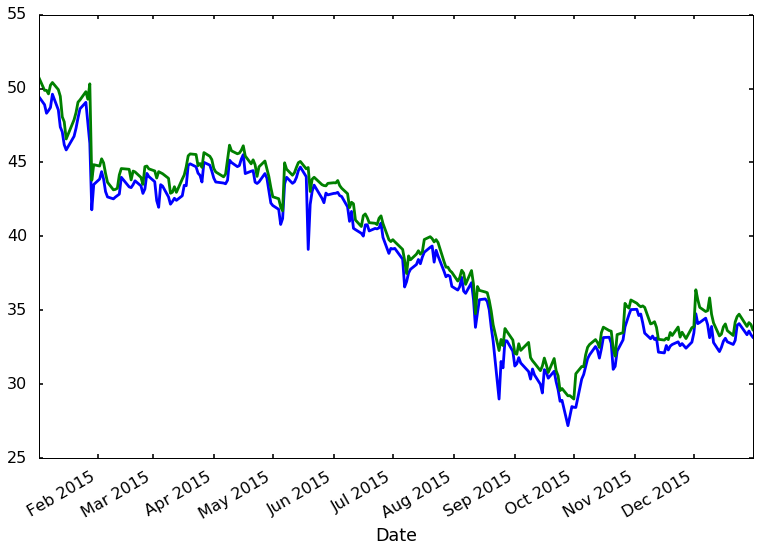

In [16]:
df["Low"].plot()
df["High"].plot()

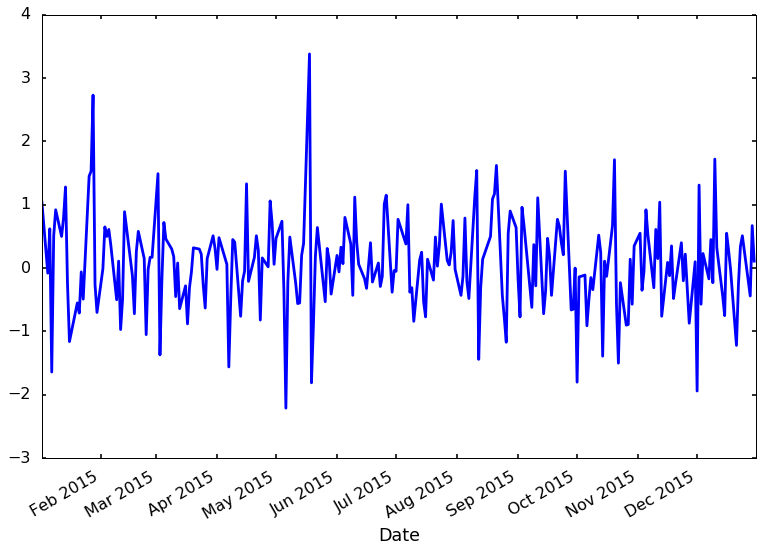

In [17]:
df["Close"].diff().plot()

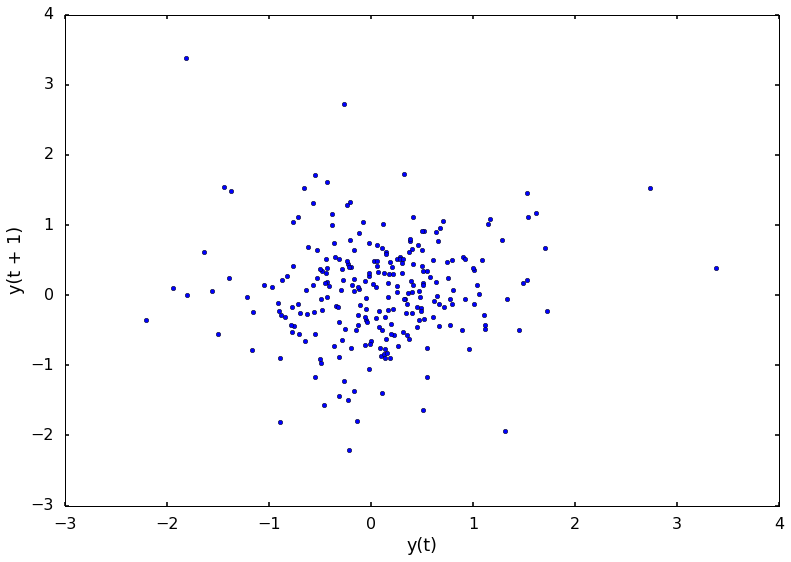

In [18]:
from pandas.tools.plotting import lag_plot
lag_plot(df["Close"].diff())

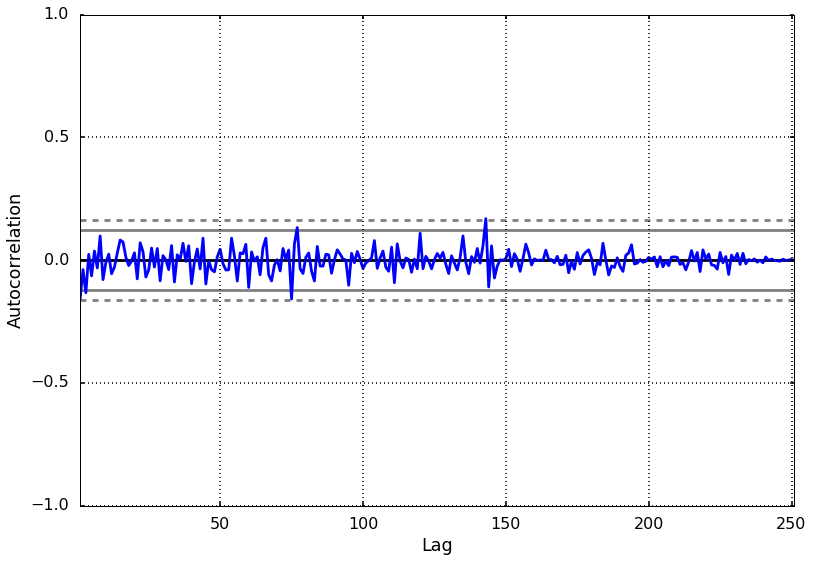

In [21]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df["Open"].diff()[1:])